In [1]:
import jupyter_black

jupyter_black.load()

%load_ext autoreload
%autoreload 2

In [2]:
import gymnasium as gym
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from ppo import PPO

In [3]:
class ActorNetwork(nn.Module):
    def __init__(self, state_dim, action_dim):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(state_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, action_dim),
        )

    def forward(self, x):
        return torch.softmax(self.network(x), dim=-1)


class CriticNetwork(nn.Module):
    def __init__(self, state_dim):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(state_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
        )

    def forward(self, x):
        return self.network(x)

In [4]:
env = gym.make("Acrobot-v1")


state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

print(f"State dimension: {state_dim}, Action dimension: {action_dim}")

actor = ActorNetwork(state_dim, action_dim)
critic = CriticNetwork(state_dim)

ppo_agent = PPO(
    env=env,
    actor=actor,
    critic=critic,
    max_training_samples=4096,
    gamma=0.99,
    epsilon=0.2,
    batch_size=128,
    num_epochs=10,
    num_training_cycles=40,
)

State dimension: 6, Action dimension: 3


In [5]:
lengths_history, rewards_history = ppo_agent.train()

100%|██████████| 40/40 [02:12<00:00,  3.31s/it]


In [6]:
avg_reward, avg_length = ppo_agent.evaluate(num_episodes=10)

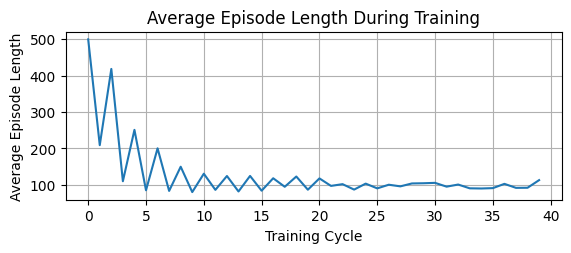

In [7]:
plt.subplot(2, 1, 1)
plt.plot(lengths_history)
plt.title("Average Episode Length During Training")
plt.xlabel("Training Cycle")
plt.ylabel("Average Episode Length")
plt.grid(True)

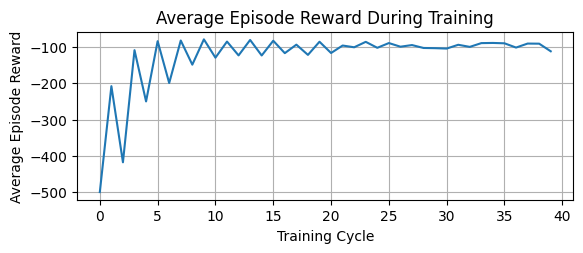

In [8]:
plt.subplot(2, 1, 2)
plt.plot(rewards_history)
plt.title("Average Episode Reward During Training")
plt.xlabel("Training Cycle")
plt.ylabel("Average Episode Reward")
plt.grid(True)